<a href="https://colab.research.google.com/github/victoriafabris/disciplina-dsp-audio-video/blob/main/atividade6/atividade_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento pixel a pixel de imagens

## Amostragem e quantização

Para uma introdução ao processamento pixel a pixel de imagens, iremos usar o formato ASCII PGM(P2) (conferir   definição e exemplos   em  http://people.sc.fsu.edu/~jburkardt/data/pgma/pgma.html).

Esse formato é bastante didático, por ser em modo **texto**, ou seja, pode ser lido diretamente por uma pessoa.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

## Leitura de arquivo no formato PGM (ASCII)

In [ ]:
# Função para leitura de arquivo PGM P2 (ASCIII)
# https://intellipaat.com/community/7530/how-to-read-pgm-p2-image-in-python
def readpgm(name):
    with open(name) as f:
        lines = f.readlines()
    # This ignores commented lines
    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)
    # here,it makes sure it is ASCII format (P2)
    assert lines[0].strip() == 'P2' 
    # Converts data to a list of integers
    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])
    return (np.array(data[3:]),(data[1],data[0]),data[2])

In [ ]:
imifsc = readpgm('ifsc.ascii.pgm')
print(imifsc)
# Observe que a imagem está representada como um vetor de uma única dimensão
# Fica difícil de visualizar as linhas e colunas

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  7,  7,  7,
        7,  0,  0, 11, 11, 11, 11,  0,  0, 15, 15, 15, 15,  0,  0,  0,  3,
        0,  0,  0,  0,  7,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0, 15,
        0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  7,  7,  7,  0,  0,  0,
       11, 11, 11, 11,  0,  0, 15,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,
        0,  7,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0, 15,  0,  0,  0,
        0,  0,  0,  3,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0, 11, 11, 11,
       11,  0,  0, 15, 15, 15, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]), (7, 24), 15)


In [ ]:
imifsc_reshape = np.reshape(imifsc[0],imifsc[1])
print(imifsc_reshape)
# Fazendo o reshape, aí sim podemos visualizar linhas e colunas
# Observe os números representando as letras de I F S C

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  7  7  7  7  0  0 11 11 11 11  0  0 15 15 15 15  0]
 [ 0  0  3  0  0  0  0  7  0  0  0  0  0 11  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  3  0  0  0  0  7  7  7  0  0  0 11 11 11 11  0  0 15  0  0  0  0]
 [ 0  0  3  0  0  0  0  7  0  0  0  0  0  0  0  0 11  0  0 15  0  0  0  0]
 [ 0  0  3  0  0  0  0  7  0  0  0  0  0 11 11 11 11  0  0 15 15 15 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


/home/fernando/.local/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


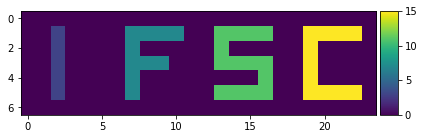

In [ ]:
io.imshow(imifsc_reshape)
# imshow aplica por default um mapa de cores (colormap) colorido

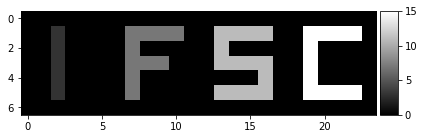

In [ ]:
io.imshow(imifsc_reshape, cmap='gray')
# Aqui para ficar com o mapa em escala de cinza. Observe que, conforme estava especificado no arquivo, 
# o branco é a intensidade 15

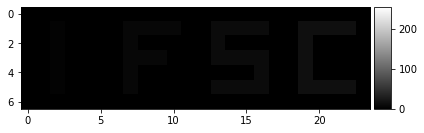

In [ ]:
io.imshow(imifsc_reshape, cmap='gray', vmin=0, vmax=255)
# E aqui, a mesma imagem, mas com os limites entre 0 e 255 (ou seja, branco será 255).
# Assim, aquela imagem que tinha intensidade máxima de 15 irá ficar bem escura
# Tanto que nem será possível distinguir as letras

# Contraste

Como as letras ficaram "ocultas", por ter baixo contraste com o fundo, iremos aumentar o contraste.

Na função contraste, a operação aplicada sobre a intensidade de cada pixel é $I_{new}(u,v)= f_c⋅I(u,v)$, onde $f_c$ é um fator de contraste multiplicado pela intensidade original. A função deve limitar a intensidade entre 0 e 255 (com valores inteiros)

In [ ]:
# Demonstração do laço principal para alteração de contraste
for j in range(imifsc_reshape.shape[0]):
    for k in range(imifsc_reshape.shape[1]):
        imifsc_reshape[j,k]=17*imifsc_reshape[j,k]

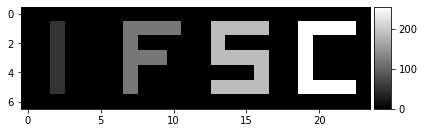

In [ ]:
io.imshow(imifsc_reshape, cmap='gray', vmin=0, vmax=255)
# Observe como as letras "apareceram" com a alteração de contraste

# Atividade

1. Faça uma **função** *altera_contraste()* que receba uma matriz (`nparray`) e um fator de multiplicação e retorne uma nova matriz com o contraste modificado. Lembre de limitar a intensidade entre 0 e 255 dentro da função. Informe com um _warning_ se isso ocorrer.  

2. Operação **brilho**. Para alterar o brilho de uma imagem, a operação aplicada sobre a intensidade de cada pixel é $I_{new}(u,v)=f_b+I(u,v)$, onde $f_b$ é um fator de brilho somado à intensidade original. Faça uma **função** *altera_brilho()* que receba uma matriz (`nparray`) e um fator de adição e retorne uma nova matriz com o brilho modificado. Lembre de limitar a intensidade entre 0 e 255 dentro da função. Informe com um _warning_ se isso ocorrer.

3. Teste as duas funções com a imagem _daeln.pgm_

Para o contraste, submeta no Moodle a imagem com o fator de aumento 5 (terá saturação)

Para o brilho, submeta no Moodle a imagem com o fator de diminuição 80 (também terá saturação, mas para baixo)